In [1]:
import tensorflow as tf

In [2]:
ds=tf.keras.preprocessing.image_dataset_from_directory("C:/Users\chera\OneDrive\Documents\prj")

Found 40 files belonging to 3 classes.


In [3]:
print(ds.class_names)

['dhoni', 'messi', 'rohith_sharma']


In [4]:
ds1=tf.keras.preprocessing.image_dataset_from_directory('./PLD_3_Classes_256/Testing')

Found 405 files belonging to 3 classes.


In [5]:
ds2=tf.keras.preprocessing.image_dataset_from_directory('./PLD_3_Classes_256/Validation')

Found 416 files belonging to 3 classes.


In [6]:
ds3=tf.keras.preprocessing.image_dataset_from_directory('./PLD_3_Classes_256/Training')

Found 3251 files belonging to 3 classes.


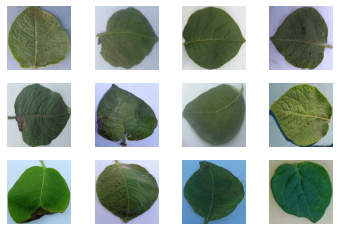

In [7]:
import matplotlib.pyplot as plt
for im,b in ds1.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.axis("off")

In [8]:
resize_scale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
    tf.keras.layers.experimental.preprocessing.Resizing(256,256)
])
agument=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [9]:
model=tf.keras.Sequential()
model.add(resize_scale)
model.add(agument)
model.add(tf.keras.Sequential([
           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(64,activation='relu'),
           tf.keras.layers.Dense(32,activation='relu'),
           tf.keras.layers.Dense(3,activation='softmax'),
    
]))

In [10]:
train=ds3.cache().prefetch(1)
test=ds1.cache()
val=ds2.cache().prefetch(1)

In [11]:
model.build((128,256,256,3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (128, 256, 256, 3)        0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 3)                 815555    
                                                                 
Total params: 815,555
Trainable params: 815,555
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [13]:
hst=model.fit(
    train,
    epochs=9,
)

Epoch 1/9
102/102 [==============================] - 282s 3s/step - loss: 1.0540 - accuracy: 0.4269
Epoch 2/9
102/102 [==============================] - 271s 3s/step - loss: 0.8018 - accuracy: 0.6469
Epoch 3/9
102/102 [==============================] - 266s 3s/step - loss: 0.5407 - accuracy: 0.7905
Epoch 4/9
102/102 [==============================] - 639s 6s/step - loss: 0.3270 - accuracy: 0.8757
Epoch 5/9
102/102 [==============================] - 268s 3s/step - loss: 0.2740 - accuracy: 0.9016
Epoch 6/9
102/102 [==============================] - 265s 3s/step - loss: 0.2046 - accuracy: 0.9311
Epoch 7/9
102/102 [==============================] - 264s 3s/step - loss: 0.1578 - accuracy: 0.9465
Epoch 8/9
102/102 [==============================] - 811s 8s/step - loss: 0.1572 - accuracy: 0.9446
Epoch 9/9
102/102 [==============================] - 268s 3s/step - loss: 0.1399 - accuracy: 0.9499


In [14]:
tf.config.list_physical_devices('GPU')

[]

In [15]:
model.evaluate(test)

13/13 [==============================] - 9s 626ms/step - loss: 0.1333 - accuracy: 0.9358


[0.13330399990081787, 0.9358024597167969]

In [16]:
l=[]
import numpy as np
for i,j in test.take(1):
    k=model.predict(i)
    l=[np.argmax(a) for a in k]
    print(l,j)

1/1 [==============================] - 1s 750ms/step
[2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1] tf.Tensor([2 2 0 0 2 2 2 0 0 1 1 0 0 2 2 2 0 1 2 0 1 0 0 2 2 2 2 1 1 2 1 1], shape=(32,), dtype=int32)


In [17]:
model.save('modelk')


INFO:tensorflow:Assets written to: modelk\assets


INFO:tensorflow:Assets written to: modelk\assets


In [18]:
model1=tf.keras.models.load_model('model1')

In [19]:
import numpy as np
from PIL import Image
img=Image.open('C:/Users/chera/OneDrive/Documents/prj/dhoni/1.jpg')
img=np.array(img)

In [20]:
model.predict(np.array([img]))

1/1 [==============================] - 0s 167ms/step


array([[0., 0., 1.]], dtype=float32)